In [1]:
import pandas as pd
import glob 
import seaborn as sns
from joblib import dump, load
from util.DataLoaders import FileDataLoader
from util.Predictors import Model, report_to_df
import yaml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
#load data
data_loader = FileDataLoader('../data/dataset_experimentation.csv')  # Candidate , instantiate your class here
df = data_loader.load_data(impute_nas = True) 
df = df.dropna()

#load target variable and variables to drop
with open("util/config.yaml", "r") as config:
    try:
        config_dict = yaml.safe_load(config)

        drop_features = config_dict['drop_features']
        target_feature = config_dict['target_feature']
    except yaml.YAMLError as exc:
        print(exc)

#split df into train and test sets
X = df.drop(drop_features + target_feature, axis=1)
y = df[target_feature[0]]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.3, random_state=42)

In [3]:
#compare classifications reports of each model
for filename in glob.glob('../interview-test-final/util/trained_models/*'):
    clf = load(f'{filename}')
    y_pred = clf.predict(X_valid)
    report_df = report_to_df(classification_report(y_valid, y_pred))
    print(filename)
    print(report_df)
    print('')

../interview-test-final/util/trained_models\LogReg_balanced_SMOTE.joblib
                precision recall f1-score support
0             0      0.97   0.84     0.90    1974
1             1      0.46   0.84     0.59     326
2      accuracy       NaN    NaN     0.84    2300
3     macro avg      0.71   0.84     0.75    2300
4  weighted avg      0.90   0.84     0.85    2300

../interview-test-final/util/trained_models\LogReg_baseline.joblib
                precision recall f1-score support
0             0      0.92   0.97     0.94    1974
1             1      0.71   0.52     0.60     326
2      accuracy       NaN    NaN     0.90    2300
3     macro avg      0.82   0.74     0.77    2300
4  weighted avg      0.89   0.90     0.90    2300

../interview-test-final/util/trained_models\LogReg_SMOTETomek.joblib
                precision recall f1-score support
0             0      0.97   0.84     0.90    1974
1             1      0.46   0.84     0.59     326
2      accuracy       NaN    NaN     0.

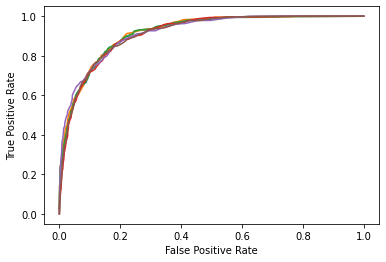

In [4]:
from sklearn import metrics
import matplotlib.pyplot as plt

for filename in glob.glob('../interview-test-final/util/trained_models/*'):
    clf = load(f'{filename}')
    y_pred_proba = clf.predict_proba(X_valid)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_valid,  y_pred_proba)

    #create ROC curve
    sns.lineplot(x = fpr, y = tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')